# VLM Benchmark Report

This notebook visualizes the results from the VLM Benchmark suite.

In [5]:
import json
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## Load Results
We load the latest benchmark result from the `results/` directory.

In [6]:
def load_latest_results(results_dir="../results"):
    # Find all json files in the results directory
    files = glob.glob(os.path.join(results_dir, "*.json"))
    if not files:
        print("No results found.")
        return None
    
    # Get the latest file based on modification time
    latest_file = max(files, key=os.path.getmtime)
    print(f"Loading results from: {latest_file}")
    
    with open(latest_file, 'r') as f:
        data = json.load(f)
    return data

data = load_latest_results()

Loading results from: ../results/1763852075.json


## Config & Metadata

In [7]:
if data:
    config = data.get('config', {})
    print(f"Model: {config.get('model_type')} ({config.get('model_name')})")
    print(f"Dataset: {config.get('dataset_name')}")
    print(f"Tasks: {', '.join(config.get('tasks', []))}")

Model: clip (openai/clip-vit-base-patch32)
Dataset: data/example/annotations.jsonl
Tasks: retrieval


## Visualizations

/var/folders/5q/9mzqx4md585dv8wffc9mtw3c0000gn/T/ipykernel_11257/519432400.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=df_retrieval, palette="viridis")


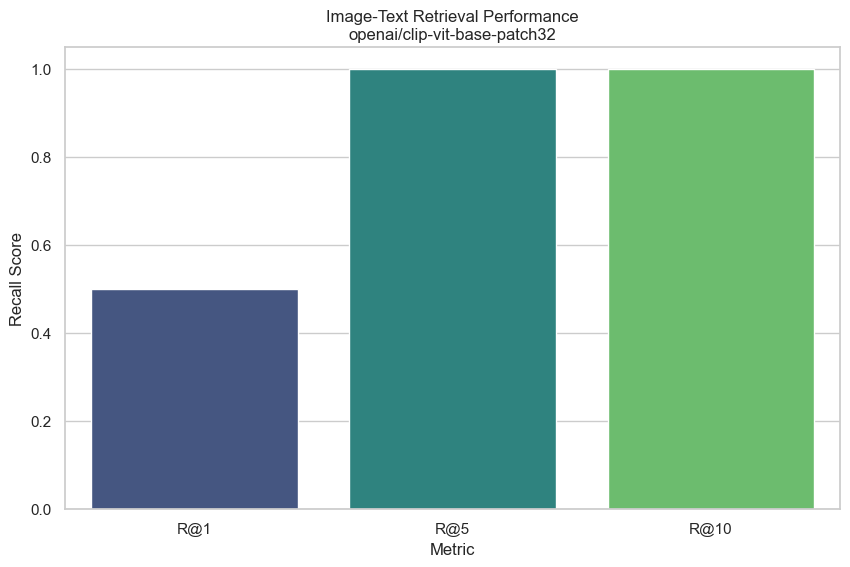

In [8]:
if data and 'metrics' in data:
    metrics = data['metrics']
    
    # 1. Image-Text Retrieval (Recall@K)
    if 'retrieval' in metrics:
        retrieval_res = metrics['retrieval']
        # Filter out error messages if any
        if isinstance(retrieval_res, dict) and 'error' not in retrieval_res:
            # Convert to DataFrame for plotting
            df_retrieval = pd.DataFrame(list(retrieval_res.items()), columns=['Metric', 'Score'])
            # Clean metric names (e.g., recall_at_1 -> R@1)
            df_retrieval['Metric'] = df_retrieval['Metric'].apply(lambda x: x.replace('recall_at_', 'R@').replace('_', ' '))
            
            plt.figure()
            sns.barplot(x='Metric', y='Score', data=df_retrieval, palette="viridis")
            plt.title(f"Image-Text Retrieval Performance\n{config.get('model_name')}")
            plt.ylim(0, 1.05)
            plt.ylabel("Recall Score")
            plt.show()
        else:
            print("Retrieval task failed or not run.")

    # 2. VQA Accuracy
    if 'vqa' in metrics:
        vqa_res = metrics['vqa']
        if isinstance(vqa_res, dict) and 'error' not in vqa_res:
            accuracy = vqa_res.get('accuracy', 0.0)
            
            plt.figure(figsize=(6, 6))
            sns.barplot(x=['Accuracy'], y=[accuracy], palette="magma")
            plt.title(f"VQA Performance\n{config.get('model_name')}")
            plt.ylim(0, 1.05)
            plt.ylabel("Score")
            # Add text label
            plt.text(0, accuracy + 0.02, f"{accuracy:.2f}", ha='center', va='bottom')
            plt.show()
        else:
            print("VQA task failed or not run.")
else:
    print("No data to visualize.")